In [2]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 7.8 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 6.8 MB/s eta 0:00:00
  Created wheel for frozendict: filename=frozendict-2.4.0-py3-none-any.whl size=15425 sha256=5101d9fd4a7a7092a7d825826bf97d3c5a8ac59b594f5880113c0c2c0190383d
  Stored in directory: /Users/ak

In [16]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

In [17]:
# Setting time range and tickers

years = 15

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*years)

tickers = ["SPY", "BND", "GLD", "QQQ", "VTI"]

In [18]:
# Downloading Adjusted Close Prices

adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    adj_close_df[ticker] = data['Adj Close']
    
print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-02-05   63.547676  50.003010   90.120003   26.712711   31.825924
2009-02-06   65.358589  49.996460   89.589996   27.411776   32.740860
2009-02-09   65.448738  50.009529   88.320000   27.525373   32.748421
2009-02-10   62.450573  50.282948   90.209999   26.511734   31.251251
2009-02-11   62.818764  50.465233   92.290001   26.389406   31.440292
...                ...        ...         ...         ...         ...
2024-01-26  487.410004  72.699997  187.009995  423.809998  242.119995
2024-01-29  491.269989  72.989998  188.330002  428.149994  244.320007
2024-01-30  490.890015  73.120003  188.589996  425.299988  243.979996
2024-01-31  482.880005  73.430000  188.449997  416.970001  239.869995
2024-02-01  489.200012  73.660004  190.410004  421.880005  243.100006

[3773 rows x 5 columns]


In [19]:
# Calculating Daily Log Returns and Dropping NAs

log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2009-02-06  0.028098 -0.000131 -0.005898  0.025833  0.028343
2009-02-09  0.001378  0.000261 -0.014277  0.004136  0.000231
2009-02-10 -0.046892  0.005452  0.021174 -0.037521 -0.046795
2009-02-11  0.005878  0.003619  0.022796 -0.004625  0.006031
2009-02-12  0.000717 -0.002584  0.009490  0.012177  0.002642
...              ...       ...       ...       ...       ...
2024-01-26 -0.001271 -0.001512 -0.000695 -0.005975 -0.000826
2024-01-29  0.007888  0.003981  0.007034  0.010188  0.009045
2024-01-30 -0.000774  0.001780  0.001380 -0.006679 -0.001393
2024-01-31 -0.016452  0.004231 -0.000743 -0.019780 -0.016989
2024-02-01  0.013003  0.003127  0.010347  0.011707  0.013376

[3772 rows x 5 columns]


In [20]:
# Creating an equally weighted portfolio

portfolio_value = 1000000
weights = np.array([1/len(tickers)] * len(tickers))

print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [22]:
# Calculating historical portfolio returns

historical_returns = (log_returns * weights).sum(axis=1)

print(historical_returns)

Date
2009-02-06    0.015249
2009-02-09   -0.001654
2009-02-10   -0.020916
2009-02-11    0.006740
2009-02-12    0.004489
                ...   
2024-01-26   -0.002056
2024-01-29    0.007627
2024-01-30   -0.001137
2024-01-31   -0.009947
2024-02-01    0.010312
Length: 3772, dtype: float64


In [24]:
# Finding X-Day historical returns

days = 5

range_returns = historical_returns.rolling(window=days).sum()
range_returns = range_returns.dropna()

print(range_returns)

Date
2009-02-12    0.003907
2009-02-13   -0.018717
2009-02-17   -0.035273
2009-02-18   -0.013100
2009-02-19   -0.030473
                ...   
2024-01-26    0.004543
2024-01-29    0.011047
2024-01-30    0.007823
2024-01-31   -0.001346
2024-02-01    0.004800
Length: 3768, dtype: float64


In [27]:
# Calculating VaR using the historical method

confidence_level = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_level * 100)) * portfolio_value

print(VaR)

44930.997234890994


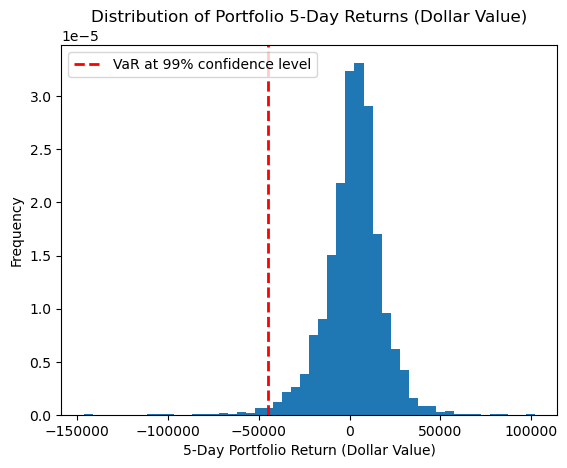

In [31]:
# Plotting the results of the historical returns

import matplotlib.pyplot as plt

return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_level:.0%} confidence level')
plt.legend()
plt.show()